## 更改套件版本

In [ ]:
!pip uninstall scipy
!pip install scipy==1.2.1

Found existing installation: scipy 1.1.0
Uninstalling scipy-1.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scipy-1.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.1.0
     |████████████████████████████████| 24.8 MB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#ref
'''
套件scipy更改方法
https://blog.csdn.net/weekdawn/article/details/97777747
'''
#有問題套件
# from scipy.misc import imresize

'\n套件scipy更改方法\nhttps://blog.csdn.net/weekdawn/article/details/97777747\n'

In [203]:
import numpy as np
from skimage.io import imread, imshow
from skimage.io import imread_collection
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import os
import skimage
from PIL import Image
from skimage.transform import resize
import cv2
import matplotlib.image as img
import glob 

## 設定雲端路徑

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
os.chdir("/content/drive/Shareddrives/paper/GaitDatasetA-silh/")
print (os.getcwd())

/content/drive/Shareddrives/paper/GaitDatasetA-silh


## code

In [209]:
#載入資料夾內所有.png
files = glob.glob("./fyc/00_1/*.png")
files.sort()
images = [cv2.imread(file) for file in files] 
print(files)
#複製一份做GEI
images_copy=images.copy()

['./fyc/00_1/fyc-00_1-001.png', './fyc/00_1/fyc-00_1-002.png', './fyc/00_1/fyc-00_1-003.png', './fyc/00_1/fyc-00_1-004.png', './fyc/00_1/fyc-00_1-005.png', './fyc/00_1/fyc-00_1-006.png', './fyc/00_1/fyc-00_1-007.png', './fyc/00_1/fyc-00_1-008.png', './fyc/00_1/fyc-00_1-009.png', './fyc/00_1/fyc-00_1-010.png', './fyc/00_1/fyc-00_1-011.png', './fyc/00_1/fyc-00_1-012.png', './fyc/00_1/fyc-00_1-013.png', './fyc/00_1/fyc-00_1-014.png', './fyc/00_1/fyc-00_1-015.png', './fyc/00_1/fyc-00_1-016.png', './fyc/00_1/fyc-00_1-017.png', './fyc/00_1/fyc-00_1-018.png', './fyc/00_1/fyc-00_1-019.png', './fyc/00_1/fyc-00_1-020.png', './fyc/00_1/fyc-00_1-021.png', './fyc/00_1/fyc-00_1-022.png', './fyc/00_1/fyc-00_1-023.png', './fyc/00_1/fyc-00_1-024.png', './fyc/00_1/fyc-00_1-025.png', './fyc/00_1/fyc-00_1-026.png', './fyc/00_1/fyc-00_1-027.png', './fyc/00_1/fyc-00_1-028.png', './fyc/00_1/fyc-00_1-029.png', './fyc/00_1/fyc-00_1-030.png', './fyc/00_1/fyc-00_1-031.png', './fyc/00_1/fyc-00_1-032.png', './fyc/

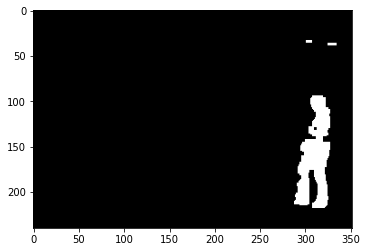

(240, 352, 3)


In [210]:
plt.imshow(images_copy[0])
plt.show()
print(images_copy[0].shape)


In [211]:
def show_debug(no,string):
  print(f'====={no}======')
  print(string)

In [212]:
#二維陣列
Y=images_copy[0].mean(axis=1)
X=images_copy[0].mean(axis=0)
show_debug(1,Y.shape)
#建立0~239數列，一維陣列
range_vaule=np.arange(Y.shape[0])
show_debug(2,range_vaule.shape)
#轉二維陣列
range_vaule = np.arange(Y.shape[0]).reshape((Y.shape[0], 1))
show_debug(3,range_vaule.shape)


temp_vaule=range_vaule * Y
show_debug(4,temp_vaule.shape)

=====1======
(240, 3)
=====2======
(240,)
=====3======
(240, 1)
=====4======
(240, 3)


In [213]:
def mass_center(img,is_round=True):
  Y = img.mean(axis=1)
  X = img.mean(axis=0)
  #建立0~shape的一維陣列
  range_y=np.arange(Y.shape[0])
  range_x=np.arange(X.shape[0])
  #轉二維陣列
  range_y = range_y.reshape((Y.shape[0], 1))
  range_x = range_x.reshape((X.shape[0], 1))
  #計算
  # Y_ = np.sum(np.arange(Y.shape[0]) * Y)/np.sum(Y)
  # X_ = np.sum(np.arange(X.shape[0]) * X)/np.sum(X)
  Y_=np.sum(range_y*Y)/np.sum(Y)
  X_=np.sum(range_x*X)/np.sum(X)

  if is_round:
      return int(round(X_)),int(round(Y_))
  return X_,Y_
    

def image_extract(img,w,h):
  newsize=(w,h)
  x_s = np.where(img.mean(axis=0)!=0)[0].min()
  x_e = np.where(img.mean(axis=0)!=0)[0].max()
  
  y_s = np.where(img.mean(axis=1)!=0)[0].min()
  y_e = np.where(img.mean(axis=1)!=0)[0].max()
  
  x_c,_ = mass_center(img)
  x_s = x_c-newsize[1]//2
  x_e = x_c+newsize[1]//2
  img = img[y_s:y_e,x_s if x_s>0 else 0:x_e if x_e<img.shape[1] else img.shape[1]]
  # return imresize(img,newsize)
  # return skimage.transform.resize(img,newsize)
  return np.array(Image.fromarray(img).resize(newsize))  

In [214]:
images_copy = [image_extract(i,64,128) for i in images_copy]

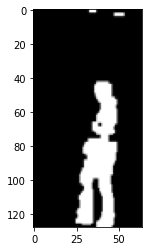

(128, 64, 3)


In [215]:
plt.imshow(images_copy[0])
plt.show()
print(images_copy[0].shape)

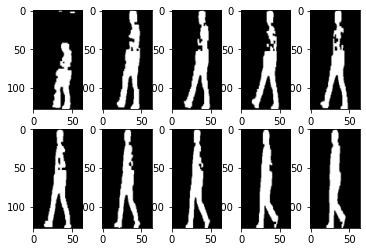

In [216]:
plt.figure()
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(images_copy[i])
plt.show()

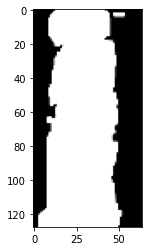

In [217]:
#有bug
gei = np.mean(images_copy,axis=0)
plt.imshow(gei)
plt.savefig('gei.jpg')
plt.show()

In [218]:
#轉換
def BGR2GRAY(img):
	gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
	return gray


def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
	d = K_size // 2

	gabor = np.zeros((K_size, K_size), dtype=np.float32)

	for y in range(K_size):
		for x in range(K_size):
			px = x - d
			py = y - d

			theta = angle / 180. * np.pi

			_x = np.cos(theta) * px + np.sin(theta) * py
			_y = -np.sin(theta) * px + np.cos(theta) * py

			gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)

	gabor /= np.sum(np.abs(gabor))

	return gabor


def Gabor_filtering(gray, K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    H, W = gray.shape
    gray = np.pad(gray, (K_size//2, K_size//2), 'edge')
    out = np.zeros((H, W), dtype=np.float32)
    gabor = Gabor_filter(K_size=K_size, Sigma=Sigma, Gamma=Gamma, Lambda=Lambda, Psi=0, angle=angle)
    for y in range(H):
        for x in range(W):
            out[y, x] = np.sum(gray[y : y + K_size, x : x + K_size] * gabor)
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    return out

def Gabor_process(img):
    H, W, _ = img.shape
    gray = BGR2GRAY(img).astype(np.float32)
    As = [0,30,60,90,120,150]
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

    out = np.zeros([H, W], dtype=np.float32)

    for i, A in enumerate(As):
        _out = Gabor_filtering(gray, K_size=11, Sigma=1.5, Gamma=1.2, Lambda=3, angle=A)
        out += _out

    out = out / out.max() * 255
    out = out.astype(np.uint8)

    return out




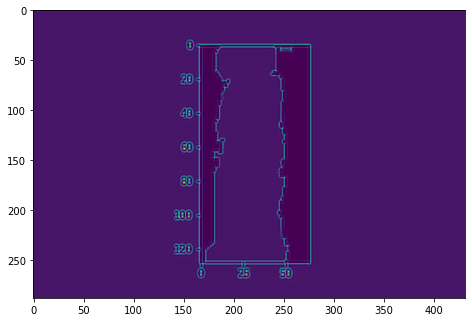

True

In [219]:
#載入GEI影像
img = cv2.imread("gei.jpg").astype(np.float32)
out = Gabor_process(img)
plt.imshow(out)
plt.show()
cv2.imwrite("out.jpg", out)


### TEST 2


In [ ]:
import glob
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Finding the center of mass of a silhouette
def CenterOfMass(img):
    height, width = img.shape
    CoMR = []
    CoMC = []
    WoR = []
    WoC = []
    for i in range(height):
        Nx = []
        for j in range(width):
            if img[i,j] == 255:
                Nx.append(j)
        if len(Nx) != 0:
            CoMR.append(sum(Nx))
            WoR.append(len(Nx))
    CoMX = sum(CoMR) // sum(WoR)
    for j in range(width):
        Ny = []
        for i in range(height):
            if img[i,j] == 255:
                Ny.append(i)
        if len(Ny) != 0:
            CoMC.append(sum(Ny))
            WoC.append(len(Ny))
    CoMY = sum(CoMC) // sum(WoC)
    return CoMX, CoMY

#Finding the corner coordinates of the rectangle surrounding the silhouette
def Border(img):
    height, width = img.shape
    index = []
    for i in range(height):
        for j in range(width):
            if img[i,j] != 0:
                index.append(j)
                break
    x = min(index)
    index = []
    for i in range(height):
        for j in reversed(range(width)):
            if img[i,j] != 0:
                index.append(j)
                break
    X = max(index)
    index = []
    for j in range(width):
        for i in range(height):
            if img[i,j] != 0:
                index.append(i)
                break
    y = min(index)
    index = []
    for j in range(width):
        for i in reversed(range(height)):
            if img[i,j] != 0:
                index.append(i)
                break
    Y = max(index)
    return x,X,y,Y

#Cropping the silhouette based on the results from Border function
def Crop(img,x,X,y,Y):
    Crop = img[y:Y, x:X]
    return Crop

#Aligning the silhouettes based on their center of mass and averaging them
def Add(old,new,center,black,i):
    center = list(center)
    height, width = old.shape
    x = (width // 2) - center[0]
    y = (height // 2) - center[1]
    height, width = new.shape
    X, Y = (x + width), (y + height)
    a = 1.0/(i + 1)
    b = 1.0 - a
    new = cv2.addWeighted(new, a, old[y:Y, x:X], b, 0.0)
    old = cv2.addWeighted(black, a, old, b, 0.0)
    old[y:Y, x:X] = new
    return old

#Importing the silhouettes, and getting their dimensions
path = glob.glob('./fyc/00_1/*.png')
im = cv2.imread(path[0])
y,x,c = im.shape

#Combining the functions
black = np.zeros((y,x), np.uint8)
GEI = black
i = 0
for path in glob.glob('./fyc/00_1/*.png'):
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    x,X,y,Y = Border(image)
    cropped = Crop(image,x,X,y,Y)
    center = CenterOfMass(cropped)
    GEI = Add(GEI,cropped,center,black,i)
    i += 1

#Saving and visualising the result
x,X,y,Y = Border(GEI)
GEI = Crop(GEI,x,X,y,Y)
cv2.imwrite('Gait_Energy_Image.png', GEI)
GEI = cv2.imread('Gait_Energy_Image.png')
plt.imshow(GEI)
plt.show()

error: ignored